In [19]:
import numpy as np
import matplotlib.pyplot as plt


def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            msd = line.split()[0]
            data.append(float(msd))
    return np.array(data)

In [20]:
data_mine = read_data('data-mine.txt')
print(len(data_mine))

data_eigen = read_data('data-eigen.txt')
print(len(data_eigen))

1000000
1000000


sample: 200
ave_mine: 0.014152242668000003
ave_eigen: 0.013340897404000001
diff: 0.0008113452640000022

sample: 500
ave_mine: 0.01412679789
ave_eigen: 0.013326319579999999
diff: 0.0008004783100000017

sample: 1000
ave_mine: 0.01419063968
ave_eigen: 0.01326351982
diff: 0.0009271198600000006

sample: 2000
ave_mine: 0.01408590432
ave_eigen: 0.01344356688
diff: 0.0006423374399999997



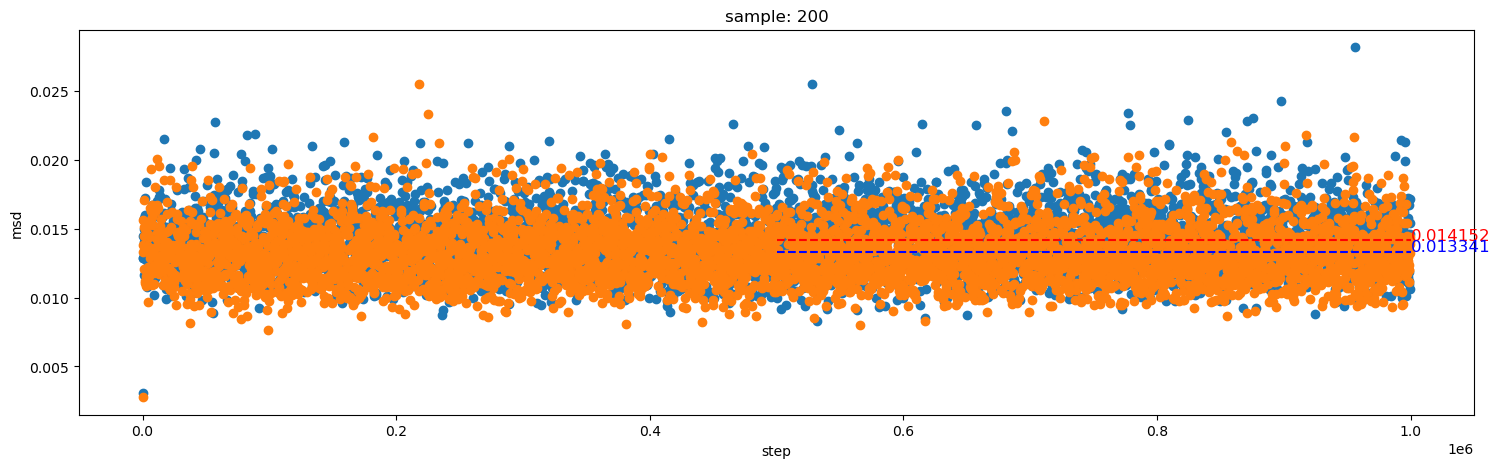

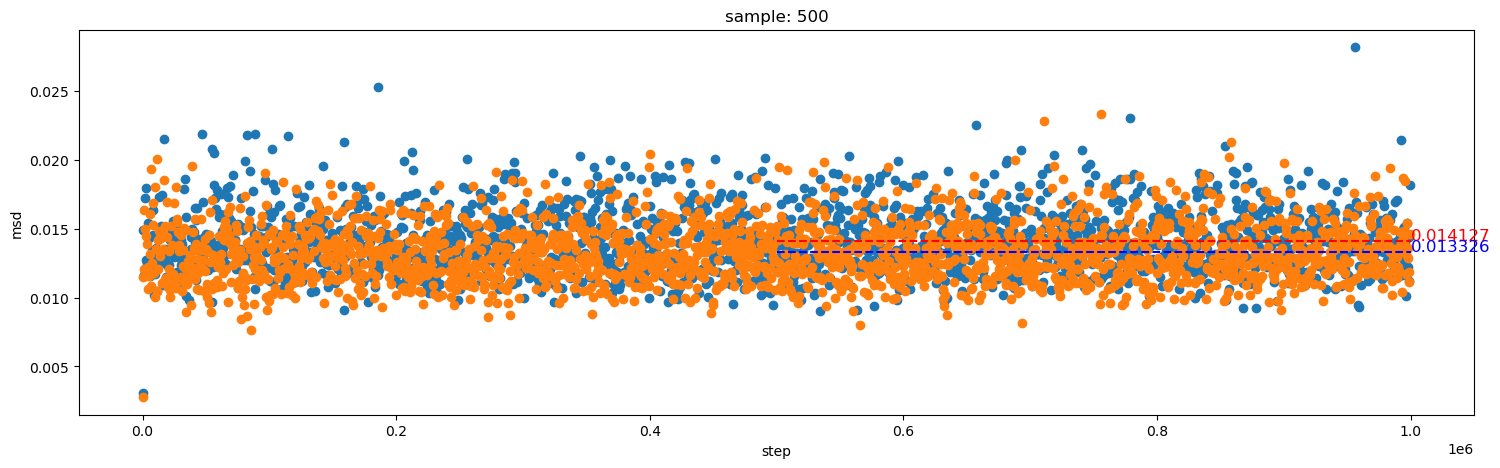

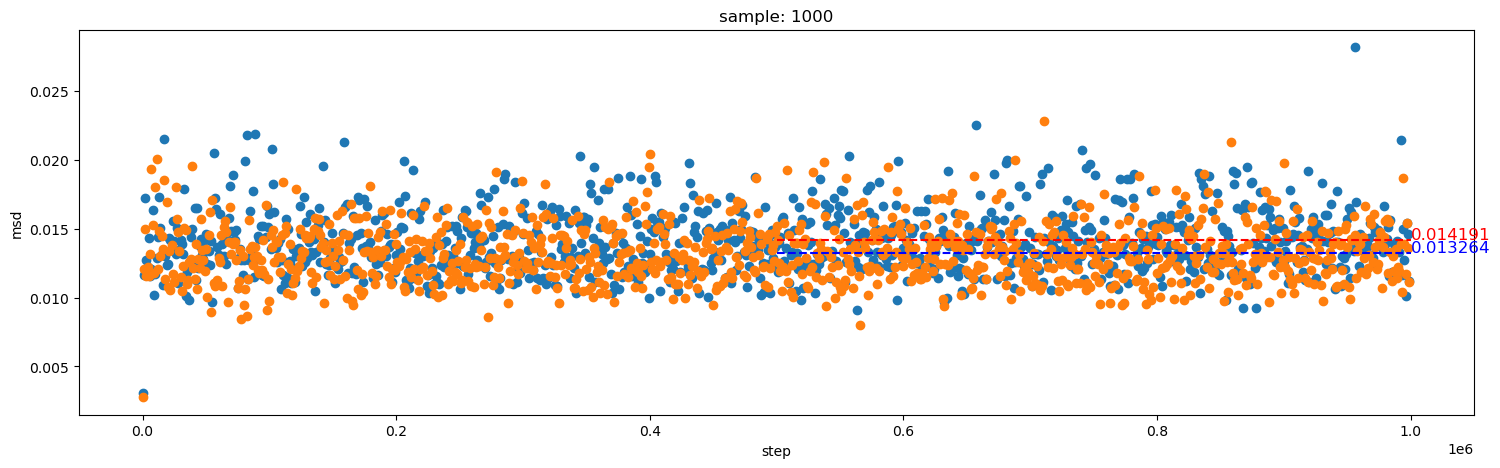

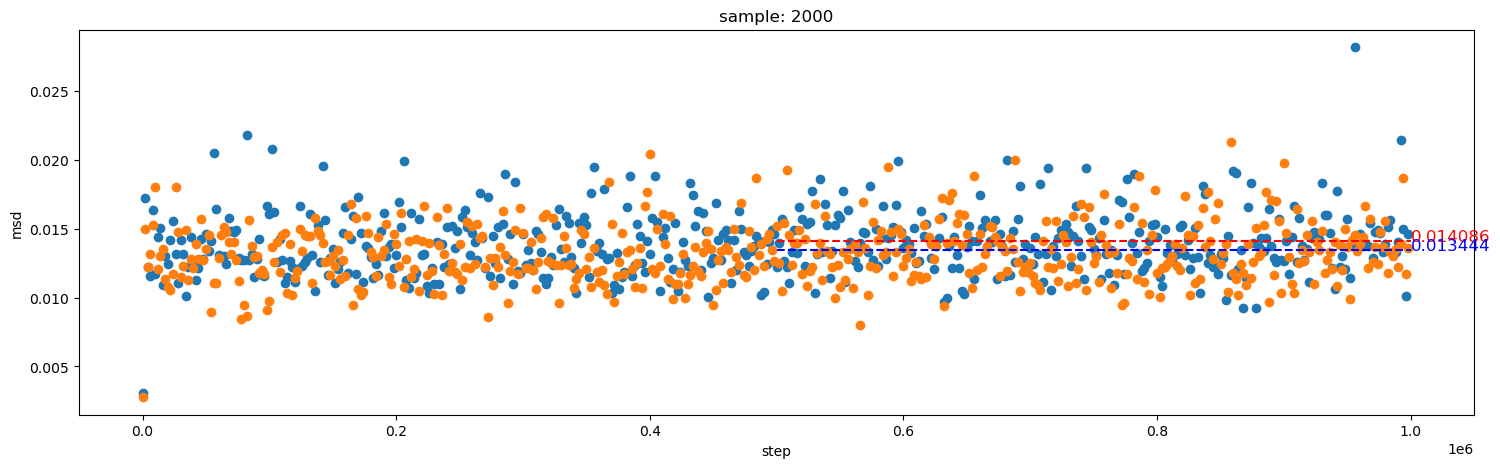

In [21]:
start = 0
end = 1000000

step = [i for i in range(len(data_mine))]

for sample in [200, 500, 1000, 2000]:
    cut = end // 2
    ave_mine = np.mean(data_mine[cut:end:sample])
    ave_eigen = np.mean(data_eigen[cut:end:sample])

    print(f'sample: {sample}')
    print(f'ave_mine: {ave_mine}')
    print(f'ave_eigen: {ave_eigen}')
    print(f'diff: {ave_mine - ave_eigen}')
    print("")

    fig, ax = plt.subplots(figsize=(18, 5))
    ax.set_title(f'sample: {sample}')
    ax.set_xlabel('step')
    ax.set_ylabel('msd')
    # ax.set_ylim(0, 0.03)

    ax.scatter(step[start:end:sample], data_mine[start:end:sample])
    ax.scatter(step[start:end:sample], data_eigen[start:end:sample])

    ax.plot([cut, end], [ave_mine, ave_mine], 'r--')
    ax.plot([cut, end], [ave_eigen, ave_eigen], 'b--')

    ax.text(end, ave_mine, f'{ave_mine:.6f}', fontsize=12, color='red')
    ax.text(end, ave_eigen, f'{ave_eigen:.6f}', fontsize=12, color='blue')

    plt.savefig(f'fig/sample-{sample}.png')